In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 변수 정의

num = 10
num_coeffs = 3
epochs = 1000
learning_rate = 0.2

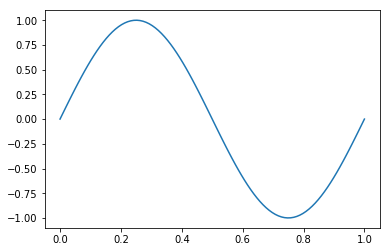

In [4]:
# 정상적인 sin(2πx)의 그래프

sinx = np.linspace(0.0, 1.0, 100)
siny = np.sin(2 * np.pi * sinx)

plt.plot(sinx, siny)
plt.show()

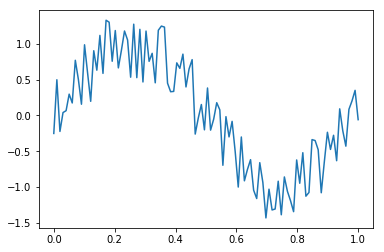

In [22]:
# sin + noise 그래프
# 랜덤 노이즈 생성하는 부분

train_x = np.linspace(0.0, 1.0, num)
n = np.random.uniform(-0.5, 0.5, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.plot(train_x, train_y)
plt.show()

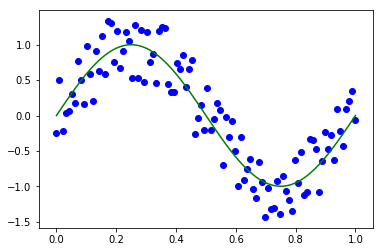

In [23]:
plt.scatter(train_x, train_y, color="blue")
#fig, ax = plt.subplots()
plt.plot(sinx, siny, color='green')
plt.show()

In [7]:
# tensorflow 변수

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#W1 = tf.Variable(tf.random_normal([1]), name='weight1')
#W2 = tf.Variable(tf.random_normal([1]), name='weight2')
#W3 = tf.Variable(tf.random_normal([1]), name='weight3')
#b = tf.Variable(tf.random_normal([1]), name='bias')

#Y_pred = tf.add(tf.multiply(X, W1), b)
#Y_pred = tf.add(tf.multiply(tf.pow(X, 2), W2), Y_pred)
#Y_pred = tf.add(tf.multiply(tf.pow(X, 3), W3), Y_pred)

Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for i in range(1, num_coeffs + 1):
    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)

In [8]:
# cost 함수

cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))
#cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_pred - Y, 2)))

In [9]:
# optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [9]:
# 변수 초기화

init = tf.global_variables_initializer()

epoch : 0, cost : 4.94832


epoch : 100, cost : 2.28756


epoch : 200, cost : 2.08008


epoch : 300, cost : 1.89452


epoch : 400, cost : 1.73427


epoch : 500, cost : 1.5959


epoch : 600, cost : 1.47637


epoch : 700, cost : 1.37305


epoch : 800, cost : 1.2837


epoch : 900, cost : 1.20637


[ 0.89185154  1.01586521  0.90522093  0.63867891  0.29500008 -0.04705501
 -0.30872583 -0.41125059 -0.27587175  0.17617416]
test cost : 9.213605


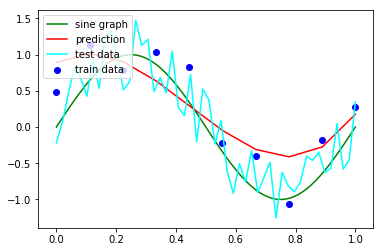

In [15]:
# 세션 시작

with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
                    
            
    #w1 = sess.run(W1)
    #w2 = sess.run(W2)
    #w3 = sess.run(W3)
    #bias = sess.run(b)
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

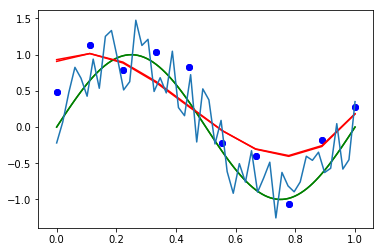

In [13]:
# 테스트 데이터 만들기
test_num = 50

test_x = np.linspace(0.0, 1.0, test_num)
n = np.random.uniform(-0.5, 0.5, test_num)
test_y = np.sin(2 * np.pi * test_x)
test_y += n

plt.plot(test_x, test_y)
plt.show()

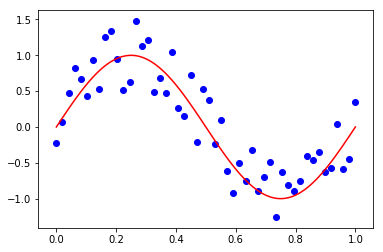

In [14]:
# 테스트 데이터 그래프

plt.scatter(test_x, test_y, color='blue')
plt.plot(sinx, siny, color='red')

plt.show()

In [ ]:
# 테스트 데이터 에러 구하기



In [16]:
num = 20

epoch : 0, cost : 20.3654


epoch : 100, cost : 12.5528


epoch : 200, cost : 11.054


epoch : 300, cost : 9.71916


epoch : 400, cost : 8.59176


epoch : 500, cost : 7.64075


epoch : 600, cost : 6.83888


epoch : 700, cost : 6.16306


epoch : 800, cost : 5.59375


epoch : 900, cost : 5.11443


[ 0.31451139  0.61451429  0.78744656  0.85019636  0.81965196  0.71270162
  0.54623395  0.33713663  0.10229897 -0.14139152 -0.37704706 -0.58777761
 -0.75669575 -0.86691427 -0.90154457 -0.84369659 -0.67648315 -0.38301754
  0.05359459  0.65023232]
test cost : 7.585618


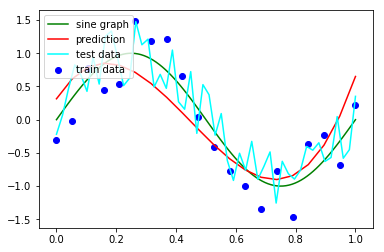

In [20]:
# N = 20
# 세션 시작

with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
                    
            
    #w1 = sess.run(W1)
    #w2 = sess.run(W2)
    #w3 = sess.run(W3)
    #bias = sess.run(b)
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

In [21]:
# N = 100
num = 100


epoch : 0, cost : 299.037


epoch : 100, cost : 31.2555


epoch : 200, cost : 28.7722


epoch : 300, cost : 26.6427


epoch : 400, cost : 24.8407


epoch : 500, cost : 23.3142


epoch : 600, cost : 22.0192


epoch : 700, cost : 20.919


epoch : 800, cost : 19.9827


epoch : 900, cost : 19.1847


[ 0.56943524  0.60234958  0.63249248  0.6599226   0.68469882  0.70687979
  0.72652447  0.74369162  0.75843996  0.77082825  0.78091526  0.78875995
  0.79442084  0.79795694  0.79942697  0.79888964  0.79640377  0.79202807
  0.78582162  0.77784282  0.76815075  0.75680387  0.74386144  0.72938162
  0.71342385  0.69604659  0.67730838  0.65726852  0.63598526  0.61351776
  0.58992481  0.56526518  0.53959739  0.5129801   0.48547271  0.45713389
  0.428022    0.39819592  0.3677147   0.33663684  0.30502117  0.27292693
  0.24041182  0.20753586  0.17435735  0.14093482  0.1073277   0.07359374
  0.03979266  0.00598288 -0.02777648 -0.06142735 -0.09491098 -0.12816715
 -0.16113877 -0.19376612 -0.22599065 -0.25775361 -0.28899646 -0.31965995
 -0.34968543 -0.37901425 -0.40758681 -0.43534613 -0.46223235 -0.48818707
 -0.51315045 -0.5370636  -0.55987048 -0.58150864 -0.60192204 -0.6210494
 -0.63883567 -0.6552186  -0.67013979 -0.68354225 -0.69536638 -0.70555258
 -0.71404362 -0.7207799  -0.72570181 -0.72875071 -0.

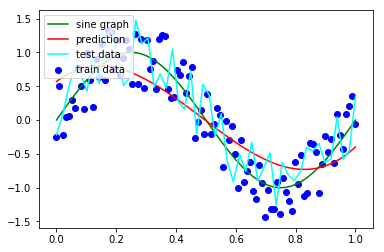

In [24]:
# N = 100
# 세션 시작

with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 100 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
                    
            
    #w1 = sess.run(W1)
    #w2 = sess.run(W2)
    #w3 = sess.run(W3)
    #bias = sess.run(b)
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue", label='train data')
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green', label='sine graph')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), color='red', label='prediction')
    
    
    # test 데이터
    test_cost = sess.run(cost, feed_dict={X:test_x, Y:test_y})
    print("test cost : %f" % test_cost)
    plt.plot(test_x, test_y, color='cyan', label='test data')
    
    plt.legend(loc=2)
    # 그래프 출력
    plt.show()

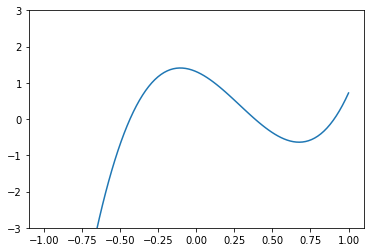

In [23]:
x = np.linspace(-1.0, 1.0, 100)
y2 = (w1 * x) + (w2 * np.power(x, 2)) + (w3 * np.power(x, 3)) + bias
plt.plot(x, y2)
plt.ylim(-3, 3)
plt.show()